In [1]:
import sys, os, pickle
sys.path.append('/home/om2382/vanilla-rtrl/')
from cluster import *
from continual_learning import *
from core import *
from dynamics import *
from functions import *
from gen_data import *
from learning_algorithms import *
from optimizers import *
from plotting import *
from torch_tools import *
from wrappers import *
import matplotlib.pyplot as plt
import torch
from torch.optim.lr_scheduler import ExponentialLR

In [2]:
T_trial = 100
task = Context_Dependent_Integration_Task(T_trial=T_trial, input_var=0.1)

In [3]:
root_name = 'BPTT_CDI_b200_50_examples_ctx0'
signal_dicts, result = unpack_cross_compare_result(root_name, checkpoint_stats={'test_loss': get_checkpoint_loss,
                                                                                'n_nodes': get_checkpoint_n_stable_FPs,
                                                                                'discriminant': get_checkpoint_cubic_discriminant,
                                                                                'lengths': get_checkpoint_maximum_cluster_distances},
                                                   results_subdir='PNAS_Paper',
                                                   multi_job_comp=True)

In [ ]:
root_name = 'BPTT_CDI_50_examples_ctx0'
results_dir = '/home/om2382/learning-dynamics/results/misc'
analysis_jobs = [j for j in os.listdir(results_dir) if root_name in j and 'analyze' in j]
checkpoints_dicts_0 = {}
for job_name in analysis_jobs:
    indices, checkpoints = unpack_analysis_results(os.path.join(results_dir, job_name))
    checkpoints_dicts[job_name] = {'indices': indices,
                                   'checkpoints': checkpoints}

In [4]:
### --- DETECT EVENTS --- ###

test_loss_threshold = -3.7
#length_threshold = -12.5
length_threshold = -12
node_threshold = 2

loss_events, line_attractor_events, node_events = detect_events(signal_dicts,
                                                                test_loss_threshold=test_loss_threshold,
                                                                length_threshold=length_threshold)

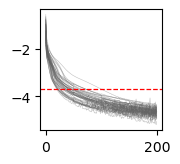

In [19]:
### --- STACK LOSS CURVES --- ###
cm = 1/2.54
fig = plt.figure(figsize=(4*cm, 4*cm))
for i_key, key in enumerate(signal_dicts):
    l = np.log10(signal_dicts[key]['test_loss'])
    #plt.plot(moving_average_filter(l, window_size=20), color='#646464', linewidth=0.4)
    plt.plot(l, color='#646464', linewidth=0.4, alpha=0.4)
plt.axhline(y=test_loss_threshold, color='r', linestyle='--', linewidth=0.9)
#plt.ylim([-3, -2])
#plt.axis('off')
#fig.savefig('figs/stacked_loss_BPTT_CDI.pdf', format='pdf')

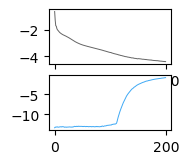

In [25]:
### --- PLOT SINGLE LOSS CURVE --- ###
cm = 1/2.54
fig, ax = plt.subplots(2, 1, figsize=(4*cm, 4*cm))
for i_key, key in enumerate(signal_dicts):
    l = np.log10(signal_dicts[key]['test_loss'])
    #plt.plot(moving_average_filter(l, window_size=20), color='#646464', linewidth=0.4)
    ax[0].plot(l, color='#646464', linewidth=0.7, alpha=1)
    ax[1].plot(signal_dicts[key]['lengths'], linewidth=0.7, color='#3FA9F5')
    break
fig.savefig('figs/loss_example_BPTT_CDI.pdf', format='pdf')

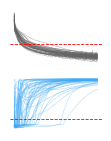

In [35]:
### --- PLOT MANY LOSS CURVES --- ###
cm = 1/2.54
fig, ax = plt.subplots(2, 1, figsize=(3*cm, 4*cm))
for i_key, key in enumerate(signal_dicts):
    l = np.log10(signal_dicts[key]['test_loss'])
    #plt.plot(moving_average_filter(l, window_size=20), color='#646464', linewidth=0.4)
    ax[0].plot(l, color='#646464', linewidth=0.4, alpha=0.44)
    ax[1].plot(signal_dicts[key]['lengths'], linewidth=0.4, color='#3FA9F5', alpha=0.4)
ax[0].axhline(y=-3.5, color='r', linestyle='--', linewidth=0.6)
ax[1].axhline(y=-11, color='r', linestyle='--', linewidth=0.6)
ax[0].axis('off')
ax[1].axis('off')
fig.savefig('figs/loss_length_all_BPTT_CDI.pdf', format='pdf')

(-100.0, 200.0)

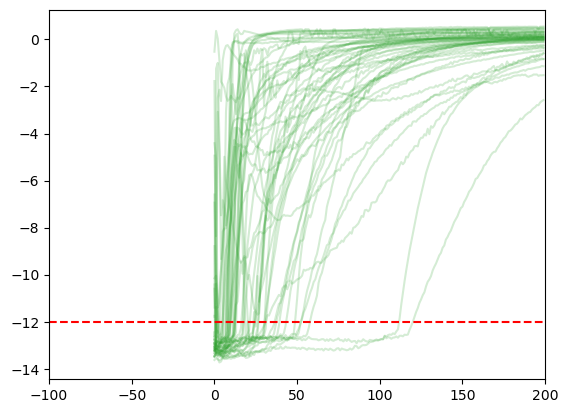

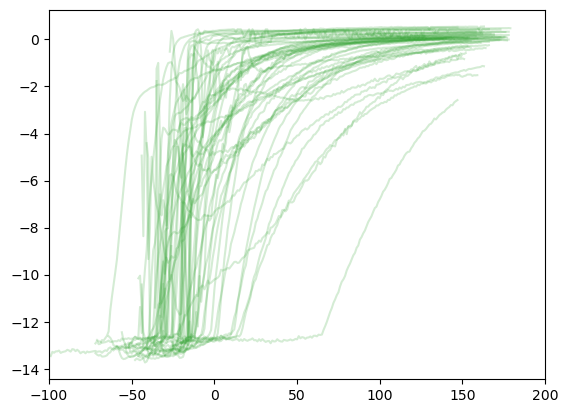

In [10]:
### --- PLOT ALIGNED TRACES --- ###
plt.figure()
for i_key, key in enumerate(signal_dicts):
    t_shift = loss_events[i_key]
    plt.plot(list(range(0, 200)), signal_dicts[key]['lengths'], color='C2', alpha=0.2)
plt.xlim([-100, 200])
plt.axhline(y=length_threshold, color='r', linestyle='--')
plt.figure()
for i_key, key in enumerate(signal_dicts):
    t_shift = loss_events[i_key]
    plt.plot(list(range(-t_shift, 200 - t_shift)), signal_dicts[key]['lengths'], color='C2', alpha=0.2)
plt.xlim([-100, 200])

SpearmanrResult(correlation=0.5862626090135173, pvalue=7.692627074620918e-06)


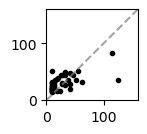

In [50]:
### --- PLOT EVENTS --- ###
from scipy.stats import spearmanr
loss_events, line_attractor_events, node_events = detect_events(signal_dicts,
                                                                test_loss_threshold=-3.5,
                                                                length_threshold=-11,
                                                                ignore_first=10)
cm = 1/2.54
fig = plt.figure(figsize=(3*cm, 3*cm))
x = np.arange(0, 200, 1)
plt.plot(line_attractor_events, loss_events, '.', color='k')
plt.plot(x, x, 'C7', linestyle='--', alpha=0.7)
plt.xlim([0, 160])
plt.ylim([0, 160])
#plt.xticks([20, 60], [200, 600])
#plt.yticks([])
#ccoef = np.corrcoef(loss_events, line_attractor_events)[0,1]
ccoef = spearmanr(loss_events, line_attractor_events)
#plt.title(f'r = {ccoef:.2f}')
print(ccoef)
fig.savefig('figs/CDI_loss_line.pdf', format='pdf')
#plt.axis('off')

In [15]:
!ls figs

stacked_loss_BPTT_CDI.pdf


In [59]:
np.corrcoef(loss_events, line_attractor_events)

array([[1.        , 0.41767049],
       [0.41767049, 1.        ]])

In [ ]:
data = task.gen_data(0, 1000)
colors = ['#0000FF', '#D62728']
col1 = '#FF0000'
col2 = '#0000FF'
col3 = '#00FF00'
col4 = '#FFFF00'
probe_colors = linearly_interpolate_colors(col1, col2, 10) + linearly_interpolate_colors(col3, col4, 10)
ssa = State_Space_Analysis(cp_1, data, n_PCs=2)
ssa = plot_checkpoint_results(cp_1, data, ssa,
                              plot_fixed_points=True,
                              plot_cluster_means=True,
                              plot_graph_structure=False,
                              plot_test_points=False,
                              n_test_samples=None,
                              T_per_sample=100,
                              test_alpha=1,
                              plot_probe=True,
                              n_probes=20,
                              probe_colors=probe_colors,
                              eig_norm_color=True,
                              graph_key='adjmat_input_1')
W_in_ = cp_1['rnn'].W_in[:,0]
W_out_ = cp_1['rnn'].W_out[0]
w_in = ssa.transform(W_in_)
w_in = w_in / norm(w_in)
w_out = ssa.transform(W_out_)
w_out = w_out / norm(w_out)
#plt.title(key + ', in-out-alignment = {}'.format(normalized_dot_product(W_in_, W_out_)))
#plt.title(key)
if True:
    #ssa.ax.plot([-w_in[0], w_in[0]],
    #            [-w_in[1], w_in[1]], color='k', linewidth=2)
    ssa.ax.plot([-w_out[0], w_out[0]],
                [-w_out[1], w_out[1]], color='g', linewidth=2)
    window_size = 1.2